In [1]:
import pandas as pd
from itertools import chain
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms
from vecstack import stacking
import seaborn as sns
path = 'https://raw.githubusercontent.com/EmmS21/SpringboardCapstoneBoxingPredictionWebApp/master/boxingdata/visuals.csv'
data = pd.read_csv(path)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,151,154,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,218,219,220,221,222,223,224,225,227,228,229,230,231,232,233,234,235,236,340,341,342,343,344,345,346,347,349,350,351,352,353,354,355,356,357,358,388,390,391,392,393,394,395,397,398,399,400,401,402,403,404,405,406,408,409,410,411,412,413,414,415,416,417,460,461,462,463,464,465,466,467,469,470,471,472,473,474,475,476,477,478,519,520,521,522,523,524,525,526,528,529,530,531,532,533,534,535,536,537,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,636,637,638,639,640,641,642,643,645,646,647,648,649,650,651,652,6

In [2]:
#convert to long so I have a row for each bout
cols = ['secondBoxer'+str(i) for i in range(1, 85)]
two = ['secondBoxerWeight'+str(i) for i in range(1,85)]
three = ['secondBoxerLast6'+str(i) for i in range(1,85)]
four = ['secondBoxerRating'+str(i) for i in range(1,85)]
five = ['secondBoxerRecord'+str(i) for i in range(1,85)]
six = ['metadata'+str(i) for i in range(1,85)]
seven = ['numberofrounds'+str(i) for i in range(1,85)]
eight = ['referee'+str(i) for i in range(1,85)]
nine = ['JudgeID'+str(i) for i in range(1,85)]
ten = ['firstBoxerWeight'+str(i) for i in range(1,85)]
eleven = ['firstBoxerRating'+str(i) for i in range(1,85)]
twelve = ['rating'+str(i) for i in range(1,85)]
thirteen = ['titles'+str(i) for i in range(1,85)]
fourteen = ['date'+str(i) for i in range(1,85)]
fifteen = ['outcome'+str(i) for i in range(1,85)]
# concated = pd.concat([pd.melt(data,id_vars=['name','global_id'],value_vars=cols,var_name='labels',value_name='opposition') for i in cols])
concated = pd.melt(data,id_vars=['name','global_id','sex','division'], value_vars = cols,var_name='label',value_name='opposition')
concated_two = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=two,var_name='weightb_label',value_name='opp_weight').drop(columns=['global_id','name','sex','division'])
concated_three = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=three,var_name='last6_label',value_name='opp_last6').drop(columns=['global_id','name','sex','division'])
concated_four = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=four,var_name='rating_label',value_name='opp_rating').drop(columns=['global_id','name','sex','division'])
concated_five = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=five,var_name='record_label',value_name='opp_record').drop(columns=['global_id','name','sex','division'])
concated_six = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=six,var_name='meta_label',value_name='meta').drop(columns=['global_id','name','sex','division'])
concated_seven = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=seven,var_name='rounds_label',value_name='rounds').drop(columns=['global_id','name','sex','division'])
concated_eight = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=eight,var_name='ref_label',value_name='ref').drop(columns=['global_id','name','sex','division'])
concated_nine = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=nine,var_name='judge_label',value_name='judge').drop(columns=['global_id','name','sex','division'])
concated_ten = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=ten,var_name='weighta_label',value_name='weight').drop(columns=['global_id','name','sex','division'])
concated_eleven = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=eleven,var_name='boxerratinga_label',value_name='boxer_rating').drop(columns=['global_id','name','sex','division'])
concated_twelve = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=twelve,var_name='rate_label',value_name='rating').drop(columns=['global_id','name','sex','division'])
concated_thirteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=thirteen,var_name='title_label',value_name='titles').drop(columns=['global_id','name','sex','division'])
concated_fourteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=fourteen,var_name='date_label',value_name='date').drop(columns=['global_id','name','sex','division'])
concated_fifteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=fifteen,var_name='outcome_label',value_name='outcome').drop(columns=['global_id','name','sex','division'])
#merge all 
fully_merged = pd.concat([concated,concated_two,concated_three,concated_four,concated_five,
          concated_six,concated_seven,concated_eight,concated_nine,concated_ten,
          concated_eleven,concated_twelve,concated_thirteen,concated_fourteen,concated_fifteen],axis=1,sort=False)
fully_merged = fully_merged.set_index('name')
# fully_merged.index = fully_merged['name']

In [3]:
fully_merged = fully_merged.reset_index()
fully_merged = fully_merged.drop(columns = ['weightb_label','last6_label','rating_label','record_label','meta_label',
                            'rounds_label','ref_label','judge_label','weighta_label','boxerratinga_label',
                            'rate_label','title_label','date_label','outcome_label','label'],axis=1)

In [4]:
#reordering columns
column_titles = ['name','weight','boxer_rating','sex','division','global_id','rating','date','outcome','opposition',
                 'opp_last6','opp_rating','opp_record','opp_weight','judge','meta','rounds','ref','titles']
fully_merged = fully_merged.reindex(columns=column_titles)

In [5]:
#cleanup data
fully_merged['outcome'] = fully_merged['outcome'].str.replace('"','')
fully_merged['opposition'] = fully_merged['opposition'].str.replace('"','')
fully_merged['weight'] = fully_merged['weight'].fillna(0).astype(int)
#converting last 6 fights to points
fully_merged['opp_last6'] = fully_merged.opp_last6.str.count('win')*10+fully_merged.opp_last6.str.count('draw')*5+fully_merged.opp_last6.str.count('loss')*-5

In [6]:
#converting opp record to points
fully_merged['opp_win'] = fully_merged['opp_record'].str.extract('win(?P<win>.*?)}').fillna(0)
fully_merged['opp_loss'] = fully_merged['opp_record'].str.extract('loss(?P<loss>.*?)win').fillna(0)
fully_merged['opp_draw'] = fully_merged['opp_record'].str.extract('draw"(?P<draw>.*?)loss').fillna(0)
fully_merged['opp_loss'] =  pd.to_numeric(fully_merged['opp_loss'],errors='coerce')
fully_merged['opp_win'] = pd.to_numeric(fully_merged['opp_win'],errors='coerce')
fully_merged['opp_draw'] = pd.to_numeric(fully_merged['opp_draw'],errors='coerce')
fully_merged.drop(columns=['opp_record'],inplace=True)

In [7]:
#droppin columns with non useful data
fully_merged.drop(columns=['boxer_rating','opp_rating'],inplace=True)

In [8]:
fully_merged['opp_weight'] = fully_merged['opp_weight'].astype(float)
fully_merged['date'] = pd.to_datetime(fully_merged['date'])
ref_points =fully_merged.judge.str.extractall(r'(\b\d+\b)').unstack().reindex(fully_merged.index)      
ref_points.columns = ref_points.columns.map('{0[0]}_{0[1]}'.format)
fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']] = ref_points[['0_0','0_1','0_2','0_3','0_4','0_5']]

In [9]:
fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']]=fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']].fillna(0)

In [10]:
fully_merged.drop(columns=['judge'],inplace=True)

In [11]:
fully_merged['ref'] = fully_merged.ref.str.replace(r"[\"\',]", '').str.replace('[','').str.replace(']','')
fully_merged['final_outcome'] = fully_merged['ref']
fully_merged.drop(columns=['ref'],inplace=True)

In [12]:
#extract rounds
rounds =fully_merged.rounds.str.extractall(r'(\b\d+\b)').unstack().reindex(fully_merged.index)
rounds.columns = rounds.columns.map('{0[0]}|{0[1]}'.format)
fully_merged[['rounds1','rounds2']] = rounds[['0|0', '0|1']]
fully_merged.drop(columns=['rounds'],inplace=True)

In [13]:
#converting meta to time
fully_merged['meta'] = fully_merged['meta'].str.replace(':','')
fully_merged['meta'] = fully_merged['meta'].str[0].fillna(0).astype(int)*60 + fully_merged['meta'].str[1:4].fillna(0).astype(int)
#cleaning up titles column
fully_merged['titles'] = fully_merged['titles'].str.replace(r"[\:\,\[\}\]]", '')
#not sure how the information in titles is structured? so dropping column for now
fully_merged.drop(columns=['titles'],inplace=True)

In [14]:
fully_merged2 = fully_merged.drop(columns=['outcome','global_id','name'])

In [15]:
X = fully_merged.drop(['final_outcome','name','sex','division','opposition','outcome','global_id'],axis=1)
X.fillna(0,inplace=True)
#need to encode strings as numeric features by using preprocessing module sklearn.preprocessing.LabelEncoder 

In [16]:
conditions = [(fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'draw MD majority decision'),
             (fully_merged['final_outcome'] == 'win SD split decision'),(fully_merged['final_outcome'] == 'win TKO technical knockout'),
              (fully_merged['final_outcome'] == 'win nan null'),(fully_merged['final_outcome'] == 'loss UD unanimous decision'),
              (fully_merged['final_outcome'] == 'win UD unanimous decision'),(fully_merged['final_outcome'] == 'loss KO knockout'),
              (fully_merged['final_outcome'] == 'loss TKO technical knockout'),(fully_merged['final_outcome'] == 'loss SD split decision'),
              (fully_merged['final_outcome'] == 'loss nan null'),(fully_merged['final_outcome'] == 'win PTS null'),
              (fully_merged['final_outcome'] == 'unknown nan null'),(fully_merged['final_outcome'] == 'loss RTD corner retirement'),
              (fully_merged['final_outcome'] == 'loss MD majority decision'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout')
             ]

In [17]:
# create new outcomes column
def cols_outcome(df,outcome_col):
    df.loc[(df[outcome_col].str.contains('win KO') == True) | (df[outcome_col].str.contains('win TKO') == True), 'clean_outcome'] = 'Win KO'
    df.loc[df[outcome_col].str.contains('draw') == True, 'clean_outcome'] = 'Draw'
    df.loc[(df[outcome_col].str.contains('win nan') == True) | (df[outcome_col].str.contains('win DQ') == True) | (df[outcome_col].str.contains('win PTS') == True) | (fully_merged[outcome_col].str.contains('win DQ') == True) | (df[outcome_col].str.contains('win UD') == True) | (df[outcome_col].str.contains('win SD') == True) | (df[outcome_col].str.contains('win MD') == True) | (df[outcome_col].str.contains('win TD') == True) | (df[outcome_col].str.contains('win RTD') == True), 'clean_outcome'] = 'Win Other'
    df.loc[(df[outcome_col].str.contains('loss KO') == True) | (df[outcome_col].str.contains('loss TKO')), 'clean_outcome'] = 'Loss KO'
    df.loc[df[outcome_col].str.contains('scheduled') == True, 'clean_outcome'] = 'Scheduled'
    df.loc[(df[outcome_col].str.contains('loss UD') == True) | (df[outcome_col].str.contains('loss SD') == True) | (df[outcome_col].str.contains('loss nan') == True) | (fully_merged[outcome_col].str.contains('loss RTD') == True) | (df[outcome_col].str.contains('loss MD') == True) | (df[outcome_col].str.contains('loss DQ') == True) | (df[outcome_col].str.contains('loss PTS') == True) | (df[outcome_col].str.contains('loss TD')), 'clean_outcome'] = 'Loss Other'
    df.loc[df[outcome_col].str.contains('unknown') == True, 'clean_outcome'] = 'Unknown'
    return df['clean_outcome']
fully_merged['clean_outcome'] = cols_outcome(fully_merged,'final_outcome')

In [18]:
fully_merged.drop(columns=['final_outcome','outcome'],inplace=True)

In [19]:
dataset = fully_merged[(fully_merged['clean_outcome'].notna()) & (fully_merged['clean_outcome'] != 'Unknown') & (fully_merged['clean_outcome'] != 'Scheduled')]

In [20]:
fully_merged['gender+division'] = fully_merged['sex'].astype(str) +' '+ fully_merged['division'].astype(str)
dataset = fully_merged[(fully_merged['clean_outcome'].notna()) & (fully_merged['clean_outcome'] != 'Unknown') & (fully_merged['clean_outcome'] != 'Scheduled')]
#get more data extracted from data scraping
filler = pd.read_csv('C:\\Users\\User\\Documents\\player_matches.csv')
filler = filler[(~filler['date'].str.contains('Council|googletag',na=False)) & (~filler['result'].str.contains('Title|tickets|scheduled',na=False))]
filler['clean_outcome'] = filler['result']+ ' ' + filler['method']
#rename fight outcomes
filler['clean_outcome'] = cols_outcome(filler,'clean_outcome')
filler.loc[(filler['clean_outcome']=='W UD')|(filler['clean_outcome']=='W SD')|(filler['clean_outcome']=='W MD')|(filler['clean_outcome']=='W PTS')|(filler['clean_outcome']=='W RTD')|(filler['clean_outcome']=='W DQ')|(filler['clean_outcome']=='W TD'), 'clean_outcome']='Win Other'
filler.loc[(filler['clean_outcome']=='W KO')|(filler['clean_outcome']=='W TKO'), 'clean_outcome']='Win KO'
filler.loc[(filler['clean_outcome']=='D MD')|(filler['clean_outcome']=='D SD')|(filler['clean_outcome']=='D TD')|(filler['clean_outcome']=='D PTS'), 'clean_outcome']='Draw'
filler.loc[(filler['clean_outcome']=='L SD')|(filler['clean_outcome']=='L UD')|(filler['clean_outcome']=='L MD')|(filler['clean_outcome']=='L RTD')|(filler['clean_outcome']=='L PTS')|(filler['clean_outcome']=='L DQ')|(filler['clean_outcome']=='L TD'), 'clean_outcome'] = 'Loss Other'
filler.loc[(filler['clean_outcome']=='L KO')|(filler['clean_outcome']=='L TKO'), 'clean_outcome'] = 'Loss KO'
filler.loc[(filler['clean_outcome']=='N NC')|(filler['clean_outcome']=='N ND'), 'clean_outcome'] = 'Unknown'
filler = filler.rename(columns={'Name':'name','opponent':'opposition'})     
#drop columns I don't need
filler.drop(columns=['w.l.d','Venue','method','result'],inplace=True)
#limit to data where we have a boxer's name
fully_m = fully_merged.dropna(subset=['name'])
#limit to rows where we don't have data for a single fight a given boxer fought
full = fully_m[fully_m['opposition'].isna().groupby(fully_m['name']).transform('all')]
#merge to get data where data is missing (and exists in other dataset)
full =full.merge(filler,on='name',how='left')
full.drop(columns=['opposition_x','clean_outcome_x'],inplace=True)
full.rename(columns={'opposition_y':'opposition','clean_outcome_y':'clean_outcome'},inplace=True)
#drop duplicates
full['duplicate_check'] = full['date_y']+full['opposition']+full['name']
full.drop_duplicates('duplicate_check',keep='first',inplace=True)
full.drop(columns='duplicate_check',inplace=True)
full.drop(columns=['date_y'],inplace=True)
full.rename(columns={'date_x':'date'},inplace=True)
#merge with dataset
dataset = pd.concat([dataset,full],axis=0)
#added win percentages for each boxer
ltd = dataset.groupby(['name','clean_outcome']).size().unstack(fill_value=0)
ltd = ltd.reset_index()
ltd['fight_count'] = ltd.sum(axis=1)
ltd[['Draw','Loss KO','Loss Other','Unknown','Win KO','Win Other']]=ltd[['Draw','Loss KO','Loss Other','Unknown','Win KO','Win Other']].div(ltd.fight_count, axis=0)
dataset = dataset.merge(ltd[['name','Draw','Loss KO','Loss Other','Win KO','Win Other','fight_count']],on='name')
# #average judge score cards per fight
dataset[['judge1boxer','judge2boxer','judge3boxer']] = dataset[['judge1boxer','judge2boxer','judge3boxer']].astype(int)
dataset[['judge1opp','judge2opp','judge3opp']] = dataset[['judge1opp','judge2opp','judge3opp']].astype(int)
n=dataset.groupby(by=['name'])['judge1boxer','judge2boxer','judge3boxer'].sum()
n.rename(columns={'judge1boxer':'judge1avg','judge2boxer':'judge2avg','judge3boxer':'judge3avg'},inplace=True)
m = dataset.groupby(by=['name'])['judge1opp','judge2opp','judge3opp'].sum()
m.rename(columns={'judge1opp':'judge1againstavg','judge2opp':'judge2againstavg','judge3opp':'judge3againstavg'},inplace=True)
dataset = dataset.merge(n,on='name').merge(m,on='name')
dataset[['judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg']] = dataset[['judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg']].div(dataset.fight_count, axis=0)
#average fight length
dataset['meta'] = dataset.groupby(by=['name'])['meta'].mean()
#added win percentage for each opponent
dataset['opp_fight_count']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['fight_count'])
dataset['opp_lossKO']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Loss KO'])
dataset['opp_lossOther']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Loss Other'])
dataset['opp_winKO']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Win KO'])
dataset['opp_winOther']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Win Other'])
dataset['opp_judge1avg']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['judge1avg'])
dataset['opp_judge2avg']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['judge2avg'])
dataset['opp_judge3avg']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['judge3avg'])
#get average fight length for opposition
dataset['opp_meta']=dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['meta'])
#categorical to numerical
dataset.loc[(dataset['clean_outcome'] == 'Win KO'), 'clean_outcome'] = 1
dataset.loc[(dataset['clean_outcome'] == 'Draw'), 'clean_outcome'] = 2
dataset.loc[(dataset['clean_outcome'] == 'Win Other'), 'clean_outcome'] = 3
dataset.loc[(dataset['clean_outcome'] == 'Loss Other'), 'clean_outcome'] = 4
dataset.loc[(dataset['clean_outcome'] == 'Loss KO'), 'clean_outcome'] = 5

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [21]:
#filter out unknown and nan
dataset = dataset[dataset['clean_outcome'].notna()]
dataset = dataset[dataset['clean_outcome'] != 'Unknown']
# I want to stratify the test_train split by gender and division to ensure all are equally represented, starting off by concatenating gender & division
strat = dataset['gender+division'] 

In [22]:
# X = dataset.drop(['clean_outcome','judge1opp','rating','judge2boxer','judge1boxer','judge2opp','judge3boxer','judge3opp','name','sex','division','opposition','gender+division','global_id','date','rounds1','rounds2'],axis=1) 
X = dataset[['Win KO','Loss Other','Win Other','Loss KO','opp_last6','opp_winOther','opp_winKO','opp_lossOther','opp_lossKO','opp_win','opp_loss','opp_judge1avg','opp_judge3avg','opp_judge2avg']]
X = X.fillna(0)
# X.loc[X['rating'] == 'null ', 'rating'] = 0
y = dataset['clean_outcome']
y = y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=strat)

In [23]:
# building the model, starting off by looking for the best parameters
params = {
    'n_estimators':[i for i in range(1,201,25)],
    'max_depth':[i for i in range(1,10,2)]
}
n_estimators = [i for i in range(0,201,20)]
rfc = RandomForestClassifier(class_weight='balanced')
gridsearch = GridSearchCV(rfc,param_grid=params,cv=10,scoring='f1_weighted',n_jobs=4)
gridsearch.fit(X_train,y_train)
bestparams = gridsearch.best_params_

In [24]:
rc = RandomForestClassifier(**bestparams)
rc.fit(X_train,y_train)
preds = rc.predict(X_test)

In [25]:
score = accuracy_score(y_test,preds)
score

0.622341756317238

In [26]:
#kfold cross validation
kfold = KFold(n_splits=5)
results = cross_val_score(rc,X_train,y_train,cv=kfold)
results

array([0.61688819, 0.61751368, 0.6247068 , 0.61229277, 0.62167657])

Text(0.5, 87.0, 'Predicted')

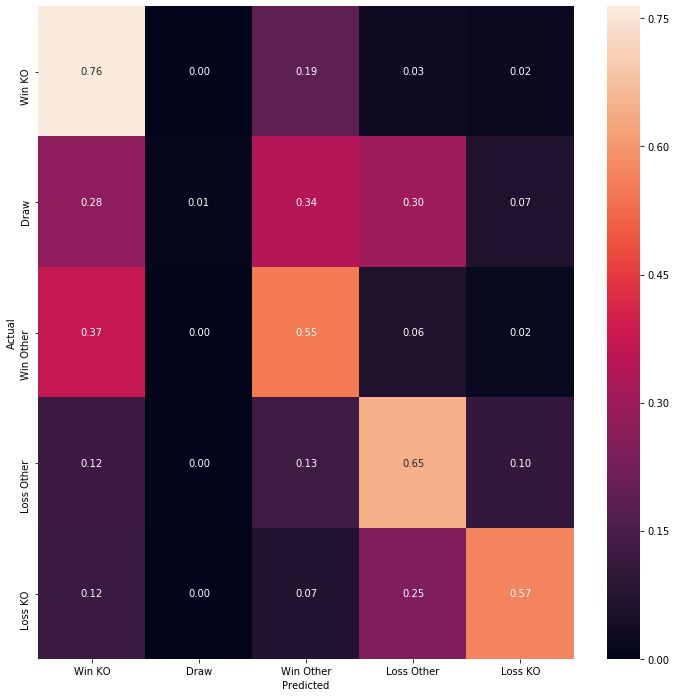

In [27]:
labels = ['Win KO','Draw','Win Other','Loss Other','Loss KO']        
c = confusion_matrix(y_test,preds)
#normalize
cm = c.astype('float')/c.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
#new matplotlib version cuts off part of first and last row, fixing this
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

([<matplotlib.axis.YTick at 0x194a9dc96c8>,
 <a list of 28 Text yticklabel objects>)

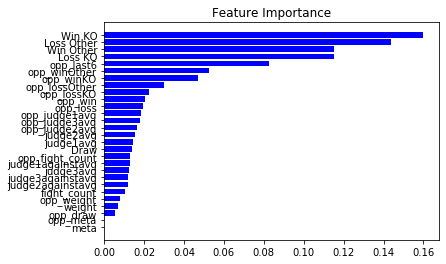

In [621]:
#feature importance
important = rc.feature_importances_
indice = np.argsort(important)
plt.title('Feature Importance')
plt.barh(range(len(indice)),important[indice],color='b',align='center')
plt.yticks(range(len(indice)), [X.columns[i] for i in indice])


In [28]:
#testing XGBoost
# X = dataset.drop(['clean_outcome','judge1opp','rating','judge2boxer','judge1boxer','judge2opp','judge3boxer','judge3opp','name','sex','division','opposition','gender+division','global_id','date','rounds1','rounds2'],axis=1) 
X = dataset[['Win KO','opp_lossKO','opp_last6','Draw','Loss Other','opp_winOther','opp_winKO','Win Other','opp_lossOther','Loss KO','opp_judge3avg']]
# X = dataset.drop(['clean_outcome','rating','judge1opp','judge2boxer','judge1boxer','judge2opp','judge3boxer','judge3opp','name','sex','division','opposition','gender+division','global_id','date','rounds1','rounds2'],axis=1) 
X = X.fillna(0)
y = dataset['clean_outcome']
y = y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=strat)

In [33]:
#best params
xgb = XGBClassifier()
params = {'min_child_weight':[5,15],
          'subsample':[0.6,0.8,1.0],
          'gamma':[1,5,10,15],
          'learning_rate': [0.01,0.05,0.1],
          'colsample_bytree':[0.6,0.8,1.0],
          'max_depth':[2,3,5,10],
          'n-estimaors': range(50,1000,50)
    }
random_search = RandomizedSearchCV(xgb,params,cv=5,n_iter=5,scoring='f1_weighted',random_state=100)
random_search.fit(X_train,y_train)
xgbest_params = random_search.best_estimator_

In [34]:
xgb = XGBClassifier(**bestparams)
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)

In [35]:
score = accuracy_score(y_test,preds)
score

0.618714035526645

In [639]:
#kfold cross validation
kfold = KFold(n_splits=5)
results = cross_val_score(xgb,X_train,y_train,cv=kfold)
results

array([0.61032056, 0.60703675, 0.61594996, 0.60791367, 0.611198  ])

In [36]:
#get feature importance
xgb.get_booster().get_score(importance_type="gain")

{'Win KO': 5.30120006751548,
 'opp_lossKO': 2.1435065721428486,
 'opp_last6': 3.187252996397541,
 'Loss Other': 5.778963905183617,
 'Draw': 3.11200078240336,
 'opp_winKO': 2.644641004462505,
 'Win Other': 4.5012022656645305,
 'opp_judge3avg': 1.627214949033663,
 'opp_winOther': 2.888688479945661,
 'Loss KO': 6.2761997222284105,
 'opp_lossOther': 2.1597706097154252}

Text(0.5, 87.0, 'Predicted')

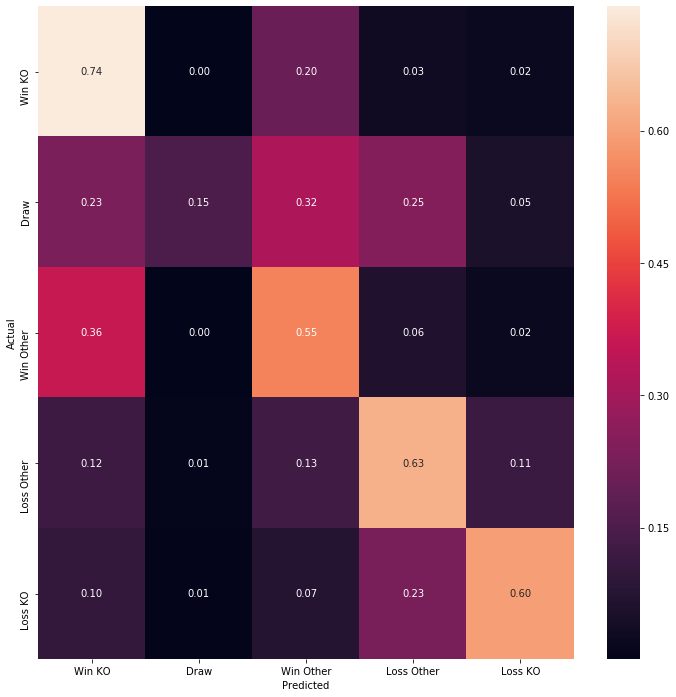

In [37]:
labels = ['Win KO','Draw','Win Other','Loss Other','Loss KO']        
c = confusion_matrix(y_test,preds)
#normalize
cm = c.astype('float')/c.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
#new matplotlib version cuts off part of first and last row, fixing this
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [45]:
#stacking XGBoost and RandomForest then running it past logistic regression
X = dataset[['Win KO','opp_win','opp_judge1avg','opp_judge2avg','opp_loss','opp_lossKO','opp_last6','Draw','Loss Other','opp_winOther','opp_winKO','Win Other','opp_lossOther','Loss KO','opp_judge3avg']]
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=strat)
models = [
    RandomForestClassifier(**bestparams),
    XGBClassifier(**bestparams)
]
S_train,S_test = stacking(models,X_train,
                          y_train,X_test,
                          regression=False,mode='oof_pred_bag',
                          needs_proba=True,metric=accuracy_score
                         )

In [46]:
model = LogisticRegression()
model = model.fit(S_train,y_train)
y_pred = model.predict(S_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
print('Final prediction score: [%.5f]' %accuracy_score(y_test,y_pred))

Final prediction score: [0.63310]


Text(0.5, 69.0, 'Predicted')

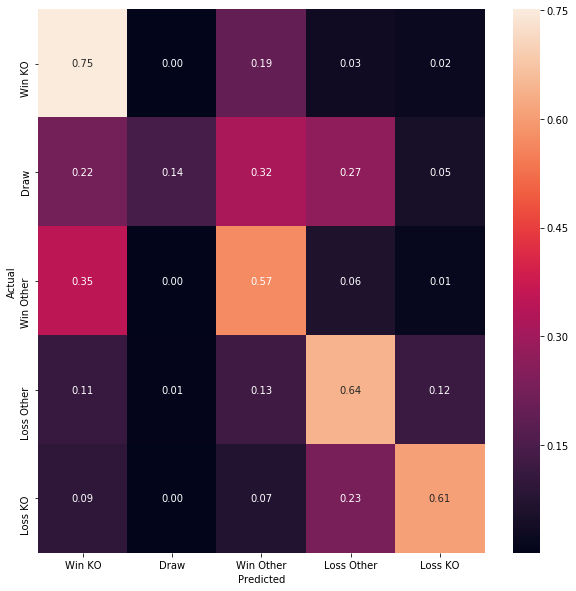

In [41]:
labels = ['Win KO','Draw','Win Other','Loss Other','Loss KO']        
c = confusion_matrix(y_test,y_pred)
#normalize
cm = c.astype('float')/c.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
#new matplotlib version cuts off part of first and last row, fixing this
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')